In [83]:
#First step is to import the Libraries we will need to use 
import pandas as pd
from datetime import datetime  
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()


In [84]:
#Now open the crude oil as csv file from the provided API and save it to df as pandas data frame 
df = pd.read_csv("https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL17.csv?api_key=H32H8imfVNVm9fcEX6kB",parse_dates=['Date'])

In [85]:
#sorting data by date 
df=df.sort_values('Date')

In [86]:
df=df.set_index('Date')

In [87]:
# first step is to print the top 5 rows of the Data and the last five rows to check the Data 
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1983-03-30,28.90,28.95,28.70,28.95,NaN,28.95,18.0,14.0
1983-03-31,28.75,28.75,28.75,28.75,NaN,28.75,3.0,13.0
1983-04-04,28.95,28.95,28.95,28.95,NaN,28.95,0.0,13.0
1983-04-05,29.00,29.10,29.00,29.10,NaN,29.10,5.0,18.0
1983-04-06,29.10,29.20,29.10,29.20,NaN,29.20,5.0,19.0


In [88]:
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-06-05,NaN,NaN,50.35,50.46,1.52,50.51,317.0,20083.0
2019-06-06,51.0,51.43,50.46,51.43,0.84,51.35,354.0,20114.0
2019-06-07,NaN,52.23,NaN,52.23,1.16,52.51,854.0,20485.0
2019-06-10,NaN,52.74,NaN,52.71,0.11,52.40,389.0,20494.0
2019-06-11,NaN,52.60,NaN,52.60,0.35,52.75,152.0,20667.0


In [89]:
# since the Data is a numeric data we would ran a  statistical analysis to check for outliers in case of any 
df.describe()
# as the following Table shows that Volume raises a question mark about the outliers and also Settle ,Last ,low,High and Open 
# but visualizing the data shows that the outliers are fact based and not bad data or errors in our Data frame but actual Data
# the price level of the crude oil and the trading volume levels are actual values so the outliers are accurate  historical Data

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,8629.000000,8791.000000,8828.000000,8945.000000,1326.000000,9094.000000,9094.000000,9094.000000
mean,41.827503,42.197400,42.029807,42.335374,0.629623,42.526324,1137.061689,12040.893006
std,29.447944,29.293458,29.140929,29.064171,0.602292,28.870130,3961.398738,25164.430685
min,10.750000,10.850000,10.400000,10.840000,0.010000,10.840000,0.000000,0.000000
25%,19.040000,19.160000,19.110000,19.200000,0.210000,19.250000,5.000000,1984.500000
50%,25.180000,25.520000,25.435000,25.780000,0.460000,26.200000,151.000000,5089.500000
75%,65.420000,65.050000,64.377500,64.200000,0.850000,63.797500,608.000000,11738.500000
max,145.880000,146.860000,143.550000,145.450000,5.930000,145.450000,59716.000000,237239.000000


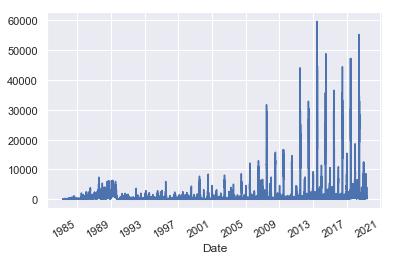

In [90]:
# Showing the Volume distribution 
df['Volume'].plot()
# This shows that the Volume plot is left skewd with the Data centralized to the right where we have spikes of trading volume 
# in 2008 during Te Financial Crisis and Years 2013,2015,2016,2017 and this is due to many reasons
#figsize=(20,10), linewidth=4, fontsize=20

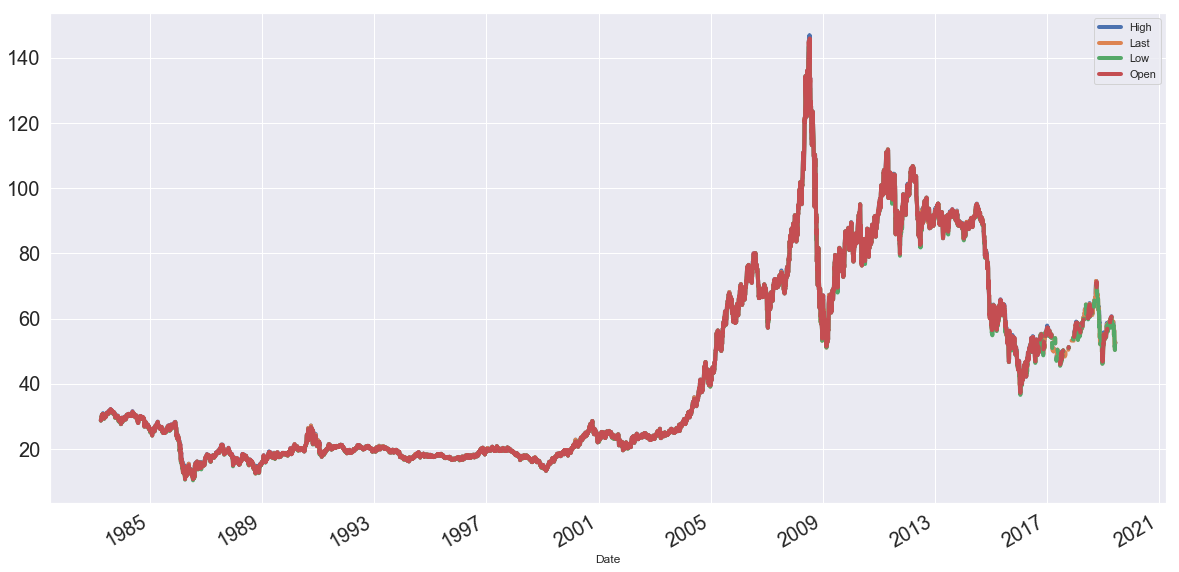

In [91]:
#plotting data on a time series plot
df[['High','Last','Low','Open']].plot(figsize=(20,10),linewidth=4, fontsize=20)
# the data is a time series data wit a trend up and high prices flactuations in the period 2008-2017 

In [92]:
df_new=df.fillna(method='ffill')
df_new['shifted']=df_new.Settle.shift()
df_new['Changes']=df_new['Settle']-df_new['shifted']
df_new.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,shifted,Changes
Date,,,,,,,,,,
2019-06-05,58.13,52.33,50.35,50.46,1.52,50.51,317.0,20083.0,52.03,-1.52
2019-06-06,51.00,51.43,50.46,51.43,0.84,51.35,354.0,20114.0,50.51,0.84
2019-06-07,51.00,52.23,50.46,52.23,1.16,52.51,854.0,20485.0,51.35,1.16
2019-06-10,51.00,52.74,50.46,52.71,0.11,52.40,389.0,20494.0,52.51,-0.11
2019-06-11,51.00,52.60,50.46,52.60,0.35,52.75,152.0,20667.0,52.40,0.35


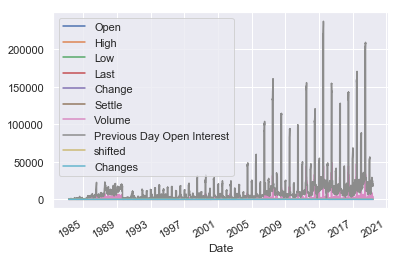

In [93]:
#Storytelling 
# first let us plot the Data to visualize any patern in our data set
df_new.plot()
#since the volume is way to high compared to the price of the commodity let us plot the price and volume each on a plot

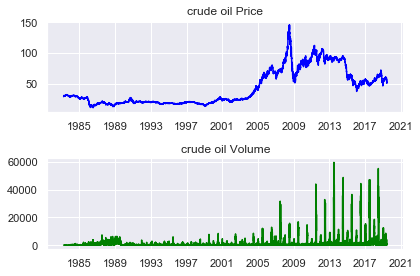

In [94]:
 # create a  first sub dataset with  the settle price and a second sub dataset with the volume and plot both sub dataset
plt.subplot(2,1,1)
plt.title('crude oil Price')
plt.plot(df_new['Settle'],color='blue')
plt.subplot(2,1,2)
plt.title('crude oil Volume')
plt.plot(df_new['Volume'],color='green')
plt.tight_layout()
plt.show()


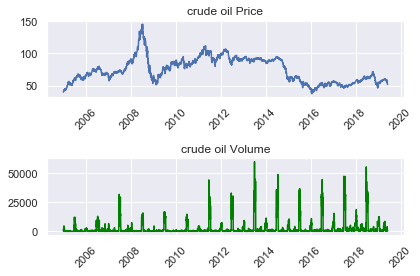

In [95]:
# the data shows up trend vs time but also we can see a very volatile market by volume especially starting 2005 when the price 
# started to go up breaking new height  so let us copmare prices decling to volume volatility 
df_settle=df_new['Settle']
df_volume=df_new['Volume']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('crude oil Price')
plt.plot(df_settle['2005-01-01':'2019-06-03'])
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('crude oil Volume')
plt.plot(df_volume['2005-01-01':'2019-06-03'],color='green')
plt.tight_layout()
plt.show() 
# A closer look at the plots shows that the volume has a seasonal pattern where it jumps in july each year with one diffrence 
# which is the trading volume from year to year 

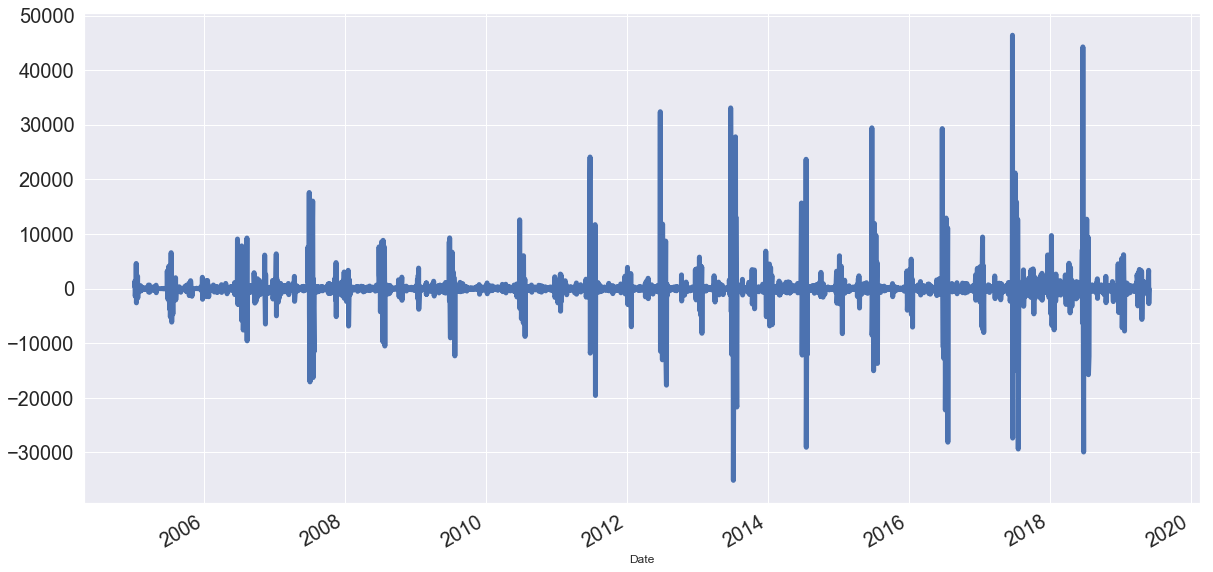

In [96]:
# let us focus on the volume chart to clarify in case we have seasonality on data
# To detect seasonality let us remove any trend in the data thus by applyinhg the diff() method and then ploting firdt order diff
df_volume['2005-01-01':'2019-05-31'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)


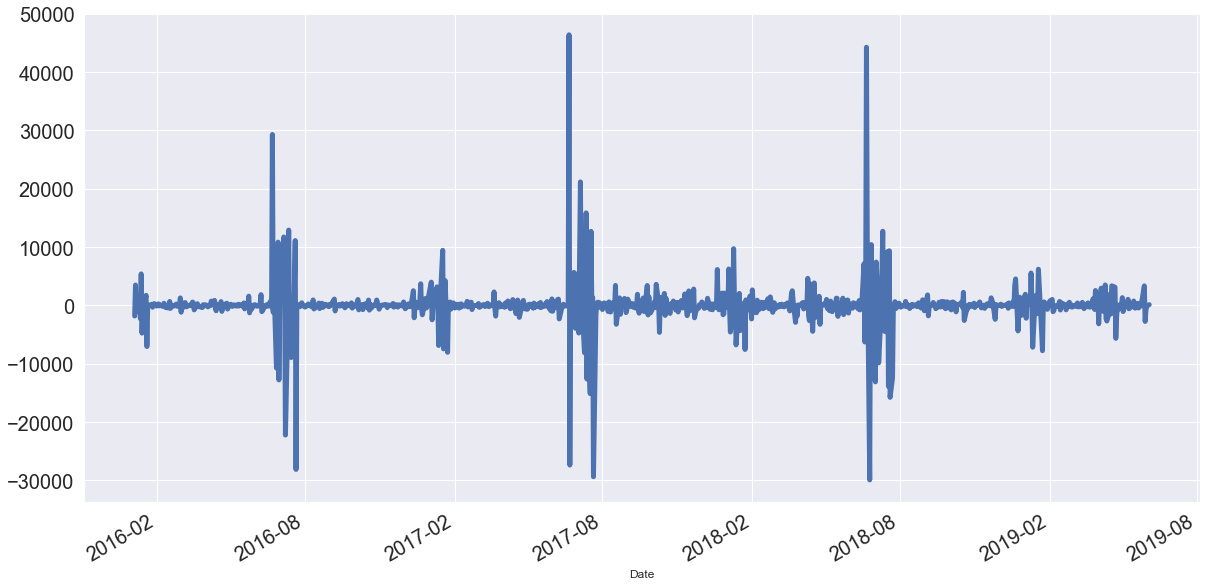

In [97]:
#drilling down more to find in which month this spike occurs 
df_volume['2016-01-01':'2019-06-03'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
#it is clearly happening in july each year but more aggresivley after 2012
# the below plot show seasonality in trading volume of oil each year in july 

In [98]:
#What drives the volume of crude oil to the highs especially in july of each year?
# It is the consumption of Oil in US AND Canada due to summer and people would travel alot
# also what is driving the volume in January and february is the oil needed for heat?
# so future conracts and options on oil are setteled in July and February and this what cuases the volume to a high spikes 

In [99]:
# as for the settelment price for oil as the time plot shows that the maximum settelement price is 145.5 
df_new['Settle']['2008-01-01':'2019-05-31'].max()


145.45

In [100]:
# as for the settelment price for oil as the time plot shows that the minimum settelement price is 37.22
df_new['Settle']['2008-01-01':'2019-05-31'].min()

                

37.22

In [101]:
# Importing the Cad dollar data set
df_cad = pd.read_csv("https://www.quandl.com/api/v3/datasets/CHRIS/CME_CD4.csv?api_key=H32H8imfVNVm9fcEX6kB",parse_dates=['Date'])

In [102]:
# setting the index as date 
df_cad=df_cad.set_index('Date')


In [103]:
#sorting data by date 
df_cad=df_cad.sort_values('Date')


In [104]:
df_cad.tail()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-06-05,0.75075,0.75075,0.74970,0.74970,0.00160,0.74840,64.0,726.0
2019-06-06,0.74885,0.75145,0.74885,0.75145,0.00295,0.75135,8.0,730.0
2019-06-07,0.75605,0.75605,0.75605,0.75605,0.00500,0.75635,68.0,738.0
2019-06-10,0.75680,0.75680,0.75680,0.75680,0.00015,0.75650,21.0,785.0
2019-06-11,0.75735,0.75735,0.75535,0.75535,0.00080,0.75570,13.0,785.0


In [105]:
# since the Data is a numeric data we would ran a  statistical analysis to check for outliers in case of any 
df_cad.describe()
# as the following Table shows that Volume raises a question mark about the outliers 
# but visualizing the data shows that the outliers are fact based and not bad data or errors in our Data frame but actual Data
# the price level of the candian dollar  and the trading volume levels are actual values so the outliers are accurate historical Data

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,9917.000000,10068.000000,10060.000000,10107.000000,1326.000000,10122.000000,10122.000000,10122.000000
mean,0.804175,0.804433,0.802981,0.803539,0.002907,0.803477,19.135052,473.863169
std,0.099429,0.098875,0.098694,0.098585,0.002417,0.098527,56.844524,462.031665
min,0.619500,0.619700,0.618300,0.618300,0.000050,0.618300,0.000000,0.000000
25%,0.732300,0.733500,0.732500,0.733200,0.001000,0.733300,0.000000,147.000000
50%,0.798700,0.798000,0.796000,0.796500,0.002300,0.796000,4.000000,340.000000
75%,0.862000,0.862000,0.860800,0.861000,0.004250,0.861000,17.000000,656.000000
max,1.087700,1.087700,1.083300,1.083300,0.016100,1.083300,1822.000000,4082.000000


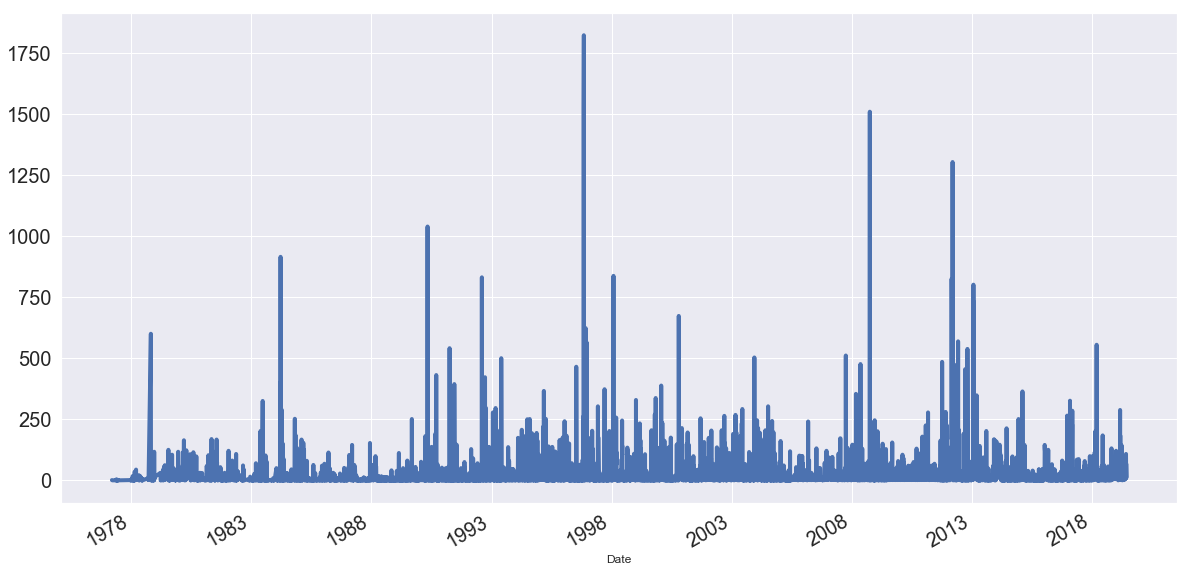

In [106]:
# Showing the Volume distribution 
df_cad['Volume'].plot(figsize=(20,10), linewidth=4, fontsize=20)
# This shows that the Volume plot shows  we have spikes of trading volume starting the years  1980,1985,1998,2001,2005
# 2013,2015,2016,2017 and this is due to many reasons

In [107]:
df_cadnew=df_cad.fillna(method='ffill')
df_cadnew['shifted']=df_cadnew.Settle.shift()
df_cadnew['Changes']=df_cadnew['Settle']-df_cadnew['shifted']
df_cadnew.tail()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,shifted,Changes
Date,,,,,,,,,,
2019-06-05,0.75075,0.75075,0.74970,0.74970,0.00160,0.74840,64.0,726.0,0.75000,-0.00160
2019-06-06,0.74885,0.75145,0.74885,0.75145,0.00295,0.75135,8.0,730.0,0.74840,0.00295
2019-06-07,0.75605,0.75605,0.75605,0.75605,0.00500,0.75635,68.0,738.0,0.75135,0.00500
2019-06-10,0.75680,0.75680,0.75680,0.75680,0.00015,0.75650,21.0,785.0,0.75635,0.00015
2019-06-11,0.75735,0.75735,0.75535,0.75535,0.00080,0.75570,13.0,785.0,0.75650,-0.00080


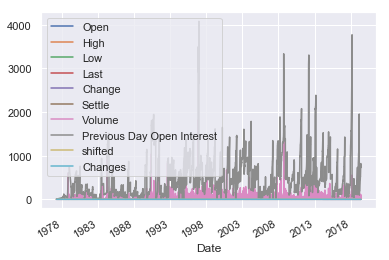

In [108]:
#Storytelling 
# first let us plot the Data to visualize any patern in our data set
df_cadnew.plot()
#since the volume is way to high compared to the price of the commodity let us plot the price and volume each on a plot

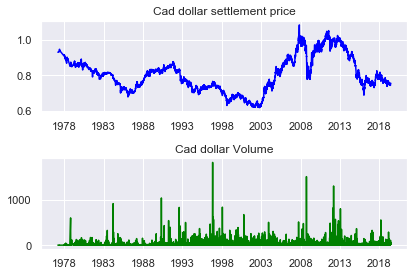

In [109]:
 # create a  first sub dataset with  the settle price and a second sub dataset with the volume and plot both sub dataset
plt.subplot(2,1,1)
plt.title('Cad dollar settlement price')
plt.plot(df_cadnew['Settle'],color='blue')
plt.subplot(2,1,2)
plt.title('Cad dollar Volume')
plt.plot(df_cadnew['Volume'],color='green')
plt.tight_layout()
plt.show()

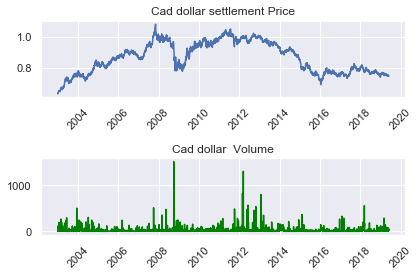

In [110]:
#What trends the time plot is showing us?
# the data shows two trends  first trend is down trend  starting 1978 til 2003
#and second one is uptrend  since 2003.Also we can see a very volatile market by volume
 
df_cadsettle=df_cadnew['Settle']
df_cadvolume=df_cadnew['Volume']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Cad dollar settlement Price')
plt.plot(df_cadsettle['2003-01-01':'2019-05-31'])
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('Cad dollar  Volume')
plt.plot(df_cadvolume['2003-01-01':'2019-05-31'],color='green')
plt.tight_layout()
plt.show() 
# A closer look at the plots shows that the volume has a two big spikes between 2008 - 2010 and 2011 - 2013

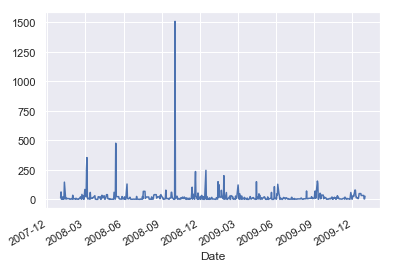

In [111]:
# investigating the seasonal trend of the volume 
df_cadvolume['2008':'2009'].plot()

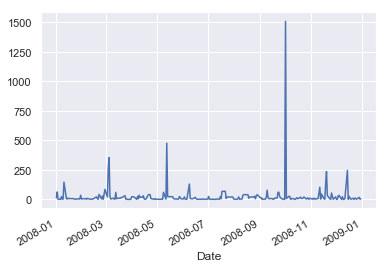

In [112]:
#closer look 
df_cadvolume['2008'].plot()

In [113]:
# The maximum volume was recorded in october 2008 was 1822 
df_cadvolume.max()

1822.0

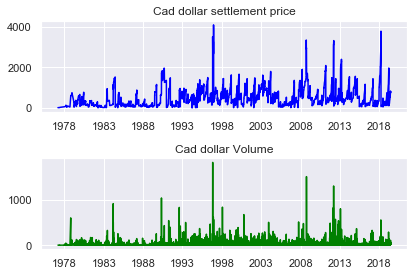

In [114]:
# what is the relation between the Opend Interest positions and Volume?
plt.subplot(2,1,1)
plt.title('Cad dollar settlement price')
plt.plot(df_cadnew['Previous Day Open Interest'],color='blue')
plt.subplot(2,1,2)
plt.title('Cad dollar Volume')
plt.plot(df_cadnew['Volume'],color='green')
plt.tight_layout()
plt.show()
# the following plots suggests a releationship between volume traded and Previous day open interest or in other words the yeild 
#payed to hold the currency. Which proves that Candian Dollar is a carry trade currency 

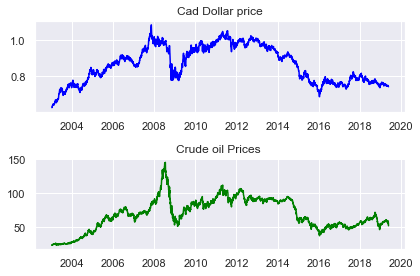

In [115]:
# what is the releation between the Cad and Crude oi?(settle prices)
# Now let us compare the Crude oil and the Canadian dollar prices movements to investigate any releationship starting 2003
plt.subplot(2,1,1)
plt.title('Cad Dollar price')
plt.plot(df_cadnew['Settle']['2003-01-01':'2019-05-31'],color='blue')
plt.subplot(2,1,2)
plt.title('Crude oil Prices ')
plt.plot(df_new['Settle']['2003-01-01':'2019-05-31'],color='green')
plt.tight_layout()
plt.show()
#The two data sets seems to be correlated follwoing the same trend.

In [116]:
# Since the two plots shows a releation ship let us investigate this by trying to figure the correlation betwwen both of them.
df_new['Settle'].corr(df_cadnew['Settle'])
# this pearson correlation shows that both data sets are highly correlated  
#indicate a strong positive  linear relationship via a firm linear rule between the settle price of crude oil and Cad dollar

0.8161116046311429

In [132]:
df_merge=df_cadnew.merge(df_new,left_index=True,right_index=True)

In [133]:
df_merge.head()

,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,shifted_x,Changes_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y,shifted_y,Changes_y
Date,,,,,,,,,,,,,,,,,,,,
1983-04-07,0.8087,0.8087,0.8087,0.8087,NaN,0.8087,0.0,10.0,0.8132,-0.0045,29.45,29.45,29.45,29.45,NaN,29.45,0.0,19.0,29.20,0.25
1983-04-08,0.8093,0.8093,0.8093,0.8093,NaN,0.8093,0.0,10.0,0.8087,0.0006,29.85,29.90,29.85,29.90,NaN,29.90,1.0,19.0,29.45,0.45
1983-04-11,0.8100,0.8100,0.8095,0.8095,NaN,0.8095,1.0,11.0,0.8093,0.0002,29.80,29.80,29.80,29.80,NaN,29.80,0.0,19.0,29.90,-0.10
1983-04-12,0.8100,0.8103,0.8100,0.8103,NaN,0.8103,1.0,12.0,0.8095,0.0008,30.40,30.40,30.40,30.40,NaN,30.40,0.0,19.0,29.80,0.60
1983-04-13,0.8103,0.8103,0.8103,0.8103,NaN,0.8103,0.0,12.0,0.8103,0.0000,30.45,30.45,30.45,30.45,NaN,30.45,0.0,19.0,30.40,0.05


In [128]:
#creating cad_settlecad_settle_x=df_merge['Settle_x']['2003-01-01':'2019-05-31']

In [129]:
#creating oil_settle
oil_settle_y=df_merge['Settle_y']['2003-01-01':'2019-05-31']


In [130]:
#Normalizig the two data sets since the ranges are  different 
#x_array = np.array(df['total_bedrooms'])
#normalized_X = preprocessing.normalize([x_array])
x_array=np.array(cad_settle_x)
y_array=np.array(oil_settle_y)
normalized_Cad_X=preprocessing.normalize([x_array])
normalized_Oil_Y=preprocessing.normalize([y_array])

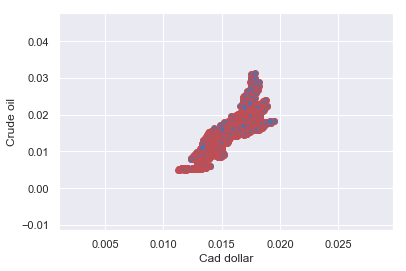

In [131]:
plt.scatter(normalized_Cad_X,normalized_Oil_Y,edgecolors='r')
plt.xlabel('Cad dollar')
plt.ylabel('Crude oil')
plt.show()
# This plot states the correlation between the Crude oil pprice and the Cad dollar rate 